In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [13]:
data = pd.read_csv("./data/dataR2.csv")
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


Text(0, 0.5, 'Leptin')

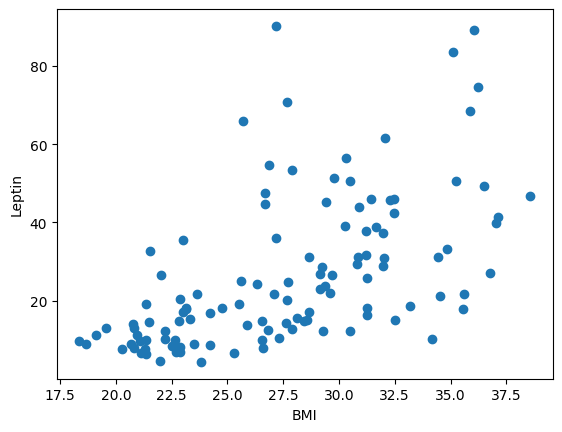

In [14]:
x = np.array(data["BMI"])
y = np.array(data["Leptin"])
plt.scatter(x,y)
plt.xlabel("BMI")
plt.ylabel("Leptin")

In [53]:
def compute_cost(x,y,w, b):
    f_wb = w * x + b

    m = len(x)
    cost = (f_wb - y) ** 2
    j_wb = (1/(2 * m)) * np.sum(cost)

    return j_wb

compute_cost(x,y,1,0)

140.99255598618413

In [54]:
def compute_gradient(x,y,w,b):
    m = len(x)
    f_wb = w * x + b
    dj_dw = (np.sum((f_wb - y) * x)) / m
    dj_db = (np.sum(f_wb - y)) / m
    # for i in range(m):
    #     f_wb = w * x[i] + b
    #     dj_dw_i = (f_wb - y[i]) * x[i]
    #     dj_db_i = (f_wb - y[i])
    #     dj_dw += dj_dw_i
    #     dj_db += dj_db_i
    # dj_dw = dj_dw / m
    # dj_db = dj_db / m

    return dj_dw, dj_db

In [55]:
compute_gradient(x,y,1,0)

(-2.7232023141563437, 0.9670306548746449)

In [56]:
compute_cost(x,y,-2.7232023141563437,0.9670306548746449 )

5499.402944289533

In [78]:
def compute_gradient_descent():

    J_history = []
    p_history = []

    alpha = 1.0e-2
    num_iters = 100
    w = 0
    b = 0

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

    if i < 10000:
        J_history.append( compute_cost(x,y,w,b))
        p_history.append([w,b])
        
    return w, b, J_history, p_history

compute_gradient_descent()


(-4.7782632101317215e+83,
 -1.6773615071461948e+82,
 [8.992247777376406e+169],
 [[-4.7782632101317215e+83, -1.6773615071461948e+82]])